In [3]:
import numpy as np
import pandas as pd
import folium
import requests
import json
import matplotlib.pyplot as plt

In [20]:
medical = pd.read_csv('./data/folium/공공보건의료기관현황.csv', encoding='cp949', index_col='연번')
medical

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,청풍호노인사랑병원,시군구립,제천시 노인전문병원 설치및 운영에 관한 조례,충청북도,해당없음,33280576,요양병원,187,27207,충청북도 제천시 금성면 청풍호로 1147,www.cplove.co.kr,043-646-0808,043-648-5827,NaN
217,충주시 노인전문병원,시군구립,충주시노인전문병원설치 및 운영에관한 조례,충청북도,해당없음,33280088,요양병원,300,27442,충청북도 충주시 동량면 대전리 1686-28,www.hyolife.com,043-855-9393,043-855-8866,NaN
218,충청북도 충주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,충청북도,해당없음,33100063,종합병원,292,27468,충청북도 충주시 안림로 239-50(안림동 134),www.cjmct.or.kr,043-871-0114,043-843-4231,NaN


In [44]:
population = pd.read_excel('./data/folium/행정구역_시군구_별__성별_인구수_2.xlsx')
population['행정구역(시군구)별(1)'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [ ]:
addr = pd.DataFrame(medical['주소'].apply(lambda item: item.split()[:2]).tolist(), columns=['시도', '구군'])
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [31]:
addr.loc[addr['시도']=='창원시']
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']
addr.loc[addr['시도']=='창원시']

,시도,구군


In [34]:
addr.loc[addr['시도']=='경산시']
addr.iloc[47] = ['경상북도', '경산시']
addr.loc[addr['시도']=='경산시']

,시도,구군


In [38]:
addr.loc[addr['시도']=='천안시']
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']
addr.loc[addr['시도']=='천안시']

,시도,구군


In [45]:
addr_alias = {
    '강원도': '강원특별자치도',
    '경기': '경기도', 
    '경남': '경상남도', 
    '경북': '경상북도', 
    '충북': '충청북도', 
    '서울시': '서울특별시', 
    '부산특별시': '부산광역시', 
    '대전시': '대전광역시', 
    '충남': '충청남도',
    '전남': '전라남도',
    '전북': '전북특별자치도'
    }
addr['시도'] = addr['시도'].replace(addr_alias)
addr['시도'].unique()

array(['강원특별자치도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시',
       '충청남도', '울산광역시', '전북특별자치도'], dtype=object)

In [50]:
addr.loc[addr['구군']=='아란13길']
addr.iloc[75] = ['제주특별자치도', '제주시']
addr['구군'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

In [62]:
addr['시도구군'] = addr['시도'] + ' ' + addr['구군']
addr['COUNT'] = 0
addr_group = addr.groupby(['시도', '구군', '시도구군'], as_index=False).count()
addr_group = addr_group.set_index('시도구군')
addr_group

,시도,구군,COUNT
시도구군,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4
강원특별자치도 동해시,강원특별자치도,동해시,1
강원특별자치도 삼척시,강원특별자치도,삼척시,1
강원특별자치도 속초시,강원특별자치도,속초시,1
강원특별자치도 양구군,강원특별자치도,양구군,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


In [75]:
population.columns = ['시도', '구군', '총인구수', '남성인구수', '여성인구수']

ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

In [84]:
population['구군'] = population['구군'].str.strip()
population = population.loc[population['구군'] != '합계', :]
population = population.loc[population['구군'] != '소계', :]
population['시도구군'] = population['시도'] + ' ' + population['구군']
population

,시도,구군,총인구수,남성인구수,여성인구수,시도구군
2,서울특별시,종로구,139378,67240,72138,서울특별시 종로구
3,서울특별시,중구,121322,58651,62671,서울특별시 중구
4,서울특별시,용산구,212175,101793,110382,서울특별시 용산구
5,서울특별시,성동구,277090,134390,142700,서울특별시 성동구
6,서울특별시,광진구,335335,161154,174181,서울특별시 광진구
...,...,...,...,...,...,...
287,경상남도,함양군,36873,17894,18979,경상남도 함양군
288,경상남도,거창군,59909,29480,30429,경상남도 거창군
289,경상남도,합천군,41096,20094,21002,경상남도 합천군
291,제주특별자치도,제주시,490888,245197,245691,제주특별자치도 제주시


In [106]:
merged = pd.merge(addr_group, population, on='시도구군', how='inner')
merged = merged[['시도구군', '시도_x', '구군_x', 'COUNT', '총인구수']]
merged.columns = ['시도구군', '시도', '구군', '의료기관수', '인구수']
# 인구 100000명당 의료기관 수
merged['MCRatio'] = merged['의료기관수'] / merged['인구수'] * 100000
merged = merged.set_index('시도구군')
merged

,시도,구군,의료기관수,인구수,MCRatio
시도구군,,,,,
강원특별자치도 강릉시,강원특별자치도,강릉시,4,209174,1.912284
강원특별자치도 동해시,강원특별자치도,동해시,1,88591,1.128783
강원특별자치도 삼척시,강원특별자치도,삼척시,1,62309,1.604905
강원특별자치도 속초시,강원특별자치도,속초시,1,82021,1.219200
강원특별자치도 양구군,강원특별자치도,양구군,1,20975,4.767580
...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27680,3.612717
충청북도 영동군,충청북도,영동군,1,44120,2.266546
충청북도 제천시,충청북도,제천시,1,129852,0.770108


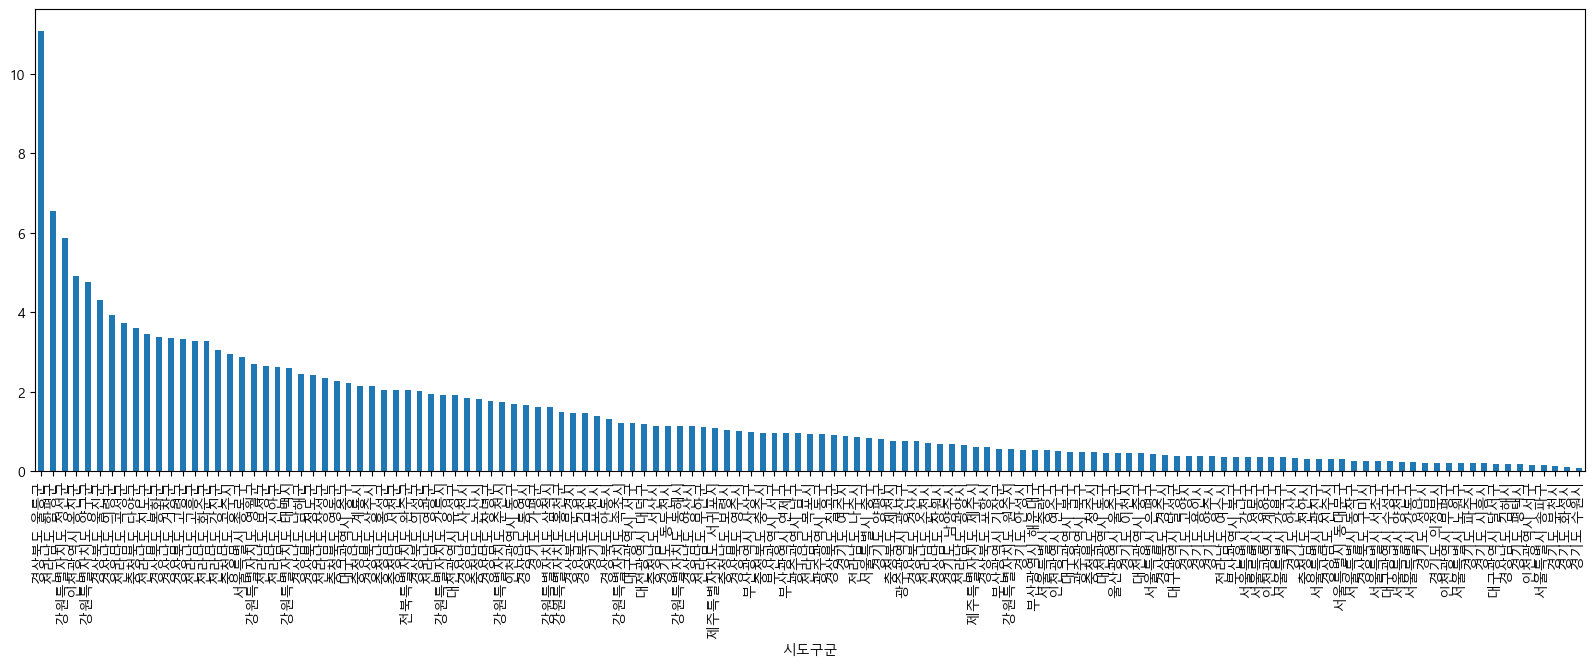

In [107]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20, 6))
mc_ratio = merged['MCRatio'].sort_values(ascending=False)
mc_ratio.plot(kind='bar', rot=90)
plt.show()

In [109]:
data_draw_korea = pd.read_csv('./data/folium/data_draw_korea.csv')
addr_alias = {'강원도': '강원특별자치도', '전라북도': '전북특별자치도'}
data_draw_korea['광역시도'] = data_draw_korea['광역시도'].replace(addr_alias)
data_draw_korea['광역시도'].unique()

array(['강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전북특별자치도',
       '제주특별자치도', '충청남도', '충청북도'], dtype=object)

In [113]:
data_draw_korea['시도구군'] = data_draw_korea['광역시도'] + ' ' + data_draw_korea['행정구역']
data_draw_korea = data_draw_korea.set_index('시도구군')
data_draw_korea

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
시도구군,,,,,,,,
강원특별자치도 강릉시,0,202520,강릉,11,4,1040.07,강원특별자치도,강릉시
강원특별자치도 고성군,1,25589,고성(강원),9,0,664.19,강원특별자치도,고성군
강원특별자치도 동해시,2,86747,동해,11,5,180.01,강원특별자치도,동해시
강원특별자치도 삼척시,3,63986,삼척,11,8,1185.80,강원특별자치도,삼척시
강원특별자치도 속초시,4,76733,속초,9,1,105.25,강원특별자치도,속초시
...,...,...,...,...,...,...,...,...
충청북도 제천시,224,127462,제천,8,10,882.47,충청북도,제천시
충청북도 증평군,225,34480,증평,6,11,81.84,충청북도,증평군
충청북도 진천군,226,62809,진천,5,11,406.08,충청북도,진천군


In [116]:
korea_merged = pd.merge(data_draw_korea, merged, on='시도구군', how='outer')
korea_merged

,Unnamed: 0,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,구군,의료기관수,인구수_y,MCRatio
시도구군,,,,,,,,,,,,,
강원특별자치도 강릉시,0,202520,강릉,11,4,1040.07,강원특별자치도,강릉시,강원특별자치도,강릉시,4.0,209174.0,1.912284
강원특별자치도 고성군,1,25589,고성(강원),9,0,664.19,강원특별자치도,고성군,NaN,NaN,NaN,NaN,NaN
강원특별자치도 동해시,2,86747,동해,11,5,180.01,강원특별자치도,동해시,강원특별자치도,동해시,1.0,88591.0,1.128783
강원특별자치도 삼척시,3,63986,삼척,11,8,1185.80,강원특별자치도,삼척시,강원특별자치도,삼척시,1.0,62309.0,1.604905
강원특별자치도 속초시,4,76733,속초,9,1,105.25,강원특별자치도,속초시,강원특별자치도,속초시,1.0,82021.0,1.219200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 제천시,224,127462,제천,8,10,882.47,충청북도,제천시,충청북도,제천시,1.0,129852.0,0.770108
충청북도 증평군,225,34480,증평,6,11,81.84,충청북도,증평군,NaN,NaN,NaN,NaN,NaN
충청북도 진천군,226,62809,진천,5,11,406.08,충청북도,진천군,NaN,NaN,NaN,NaN,NaN


In [ ]:
border_lines = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9), (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5), (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7), (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10), (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [ (19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], #광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], #부산시
]